# Logistic Regression from Scratch with NumPy
---

fonte: https://github.com/leventbass/logistic_regression/blob/master/logistic_regression.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.linear_model import LogisticRegression

#Classificadores Lineares
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

#Classificadores KNN
from sklearn.neighbors import KNeighborsClassifier

#Classificadores Naive Nayes
from sklearn.naive_bayes import MultinomialNB

#Classificadores Arvores de Decisão
from sklearn.tree import DecisionTreeClassifier

#SVM
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math

from sklearn import linear_model
from scipy.special import expit

### Exemplo de uma função Sigmóide

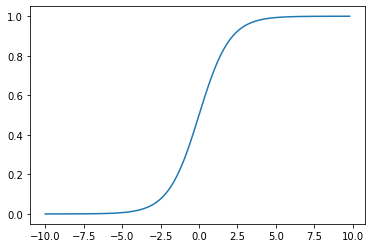

In [3]:
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

x = np.arange(0., 1., 0.001)
x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)

plt.plot(x,sig)
plt.show()

### Comparação entre uma reta para aproximar pontos e uma função sigmoid

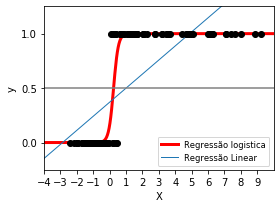

In [5]:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)

X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)

X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))

plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

## expit função sigmoid
## ravel, transforma para array 1D
loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()

plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)

plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Regressão logistica', 'Regressão Linear'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Função de custo definida com base na função Sigmoide
### Na regressão logística, aplica-se a função sigmóide à soma ponderada, o que torna o resultado resultante não linear.

In [32]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    print(h.shape)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

### A implementação da descida em gradiente aqui não é tão diferente da que usamos na regressão linear. A única diferença a ser observada é a função sigmóide aplicada à soma ponderada.

In [39]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

## Gerador de dados para classificação
## Visualização dos dados em dois eixos

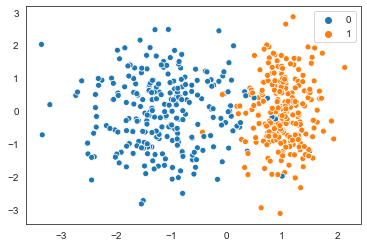

In [26]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)
y = y[:,np.newaxis]

sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));

Executando algoritmo de treino para calcular os parâmetros do modelo. 

gráfico mostra convergência do método

Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[-0.96575491]
 [ 4.34341826]
 [ 0.05202196]] 



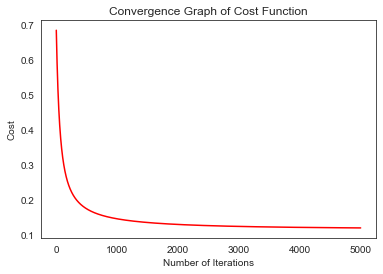

In [42]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)
y = y[:,np.newaxis]

m = len(y)

X = np.hstack((np.ones((m,1)),X))
n = np.size(X,1)
params = np.zeros((n,1))

#iterations = 1500
iterations = 5000
learning_rate = 0.03

initial_cost = compute_cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

### Avaliando qualidade do modelo

Função de predição

Classificação binária baseado em duas classes (classe 1 e classe 0).

Se o valor resultante for acima de 0,50 arredonda para 1, significando que o ponto de dados pertence à classe 1. 

Se a probabilidade de um ponto pertencente à classe 1 for inferior a 0,50, significa simplesmente que faz parte da outra classe (classe 0). 

In [10]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

In [43]:
y_pred = predict(X, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))

print(score)

cm = confusion_matrix(y, y_pred)

# precision, recall, f1 metrics

print("precision:",precision_score(y, y_pred))
print("recall:",recall_score(y, y_pred))
print("f1:",f1_score(y, y_pred))
print(cm)

0.966
precision: 0.9490196078431372
recall: 0.983739837398374
f1: 0.9660678642714571
[[241  13]
 [  4 242]]


### Mostrado separação dos dados no gráfico

[-3.64284258  2.42100505]


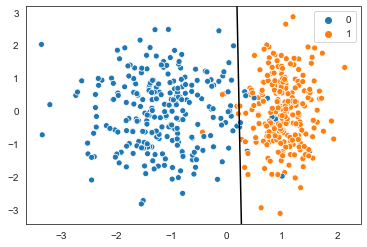

In [46]:
slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

sns.set_style('white')
sns.scatterplot(X[:,1],X[:,2],hue=y.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
print(x_vals)
plt.plot(x_vals, y_vals, c="k");

In [86]:
sgd_clf = LogisticRegression(max_iter=2000)

In [87]:
sgd_clf.fit(X, y)
score=sgd_clf.score(X, y)
ypred=sgd_clf.predict(X)

cm = confusion_matrix(y, ypred)

# precision, recall, f1 metrics

print("precision:",precision_score(y, ypred))
print("recall:",recall_score(y, ypred))
print("f1:",f1_score(y, ypred))
print("sgd_clf Score: ",score)
print(cm)


precision: 0.9490196078431372
recall: 0.983739837398374
f1: 0.9660678642714571
sgd_clf Score:  0.966
[[241  13]
 [  4 242]]


/home/silvio/.conda/envs/trackml6/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/silvio/.conda/envs/trackml6/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Mostrando alguns parâmetros do modelo

In [90]:
print(sgd_clf.classes_)
print(sgd_clf.coef_)
print(sgd_clf.intercept_)
print(sgd_clf.n_iter_)

[0 1]
[[-0.4665127   4.15486656  0.04778306]]
[-0.4665127]
[6]
